# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [94]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.service import Service
import os
import numpy as np

In [2]:
# browser = Browser('chrome')

# Set up Splinter
driver_path = os.path.join(os.path.expanduser("~"),"webdrivers","chromedriver.exe")
browser = Browser('chrome',service=Service(executable_path=driver_path))

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html


url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

browser.visit(url)

html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
row_elem = soup.find_all('tr', class_='data-row')

header_row = soup.find_all('th')

In [6]:
header_row

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [7]:
row_elem

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [57]:
# Create an empty list

mars_data = []

# Loop through the scraped data to create a list of rows

for row in row_elem:
    mars_dict ={}
    data = row.find_all('td')
    mars_dict['id'] = data[0].text.strip()
    mars_dict['terrestrial_date'] = data[1].text.strip()
    mars_dict['sol'] = data[2].text.strip()
    mars_dict['ls'] = data[3].text.strip()
    mars_dict['month'] = data[4].text.strip()
    mars_dict['min_temp'] = data[5].text.strip()
    mars_dict['pressure'] = data[6].text.strip()
    mars_data.append(mars_dict)


In [58]:
mars_data

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [74]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_data_df = pd.DataFrame(mars_data)

In [75]:
# Confirm DataFrame was created successfully

mars_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [76]:
# Examine data type of each column

mars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [77]:
# Change data types for data analysis

mars_data_df.id = mars_data_df.id.astype(int)

mars_data_df.terrestrial_date = pd.to_datetime(mars_data_df.terrestrial_date)

mars_data_df.sol = mars_data_df.sol.astype(int)

mars_data_df.ls = mars_data_df.ls.astype(int)

mars_data_df.month = mars_data_df.month.astype(int)

mars_data_df.min_temp = mars_data_df.min_temp.astype(float)

mars_data_df.pressure= mars_data_df.pressure.astype(float)



In [78]:
# Confirm type changes were successful by examining data types again

mars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [79]:
# 1. How many months are there on Mars?

mars_data_df.month.max()



12

In [80]:
# 2. How many Martian days' worth of data are there?

min_date = mars_data_df.terrestrial_date.min ()

max_date = mars_data_df.terrestrial_date.max()

days = max_date-min_date

print (f"The earliest date available is {min_date}.\n The latest date available is {max_date}. \nThere are {days} worth of data")

The earliest date available is 2012-08-16 00:00:00.
 The latest date available is 2018-02-27 00:00:00. 
There are 2021 days 00:00:00 worth of data


In [84]:
# 3. What is the average low temperature by month?

mars_data_df.groupby(by='month').min()

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,319,2013-08-01,351,0,-82.0,820.0
2,371,2013-10-03,412,30,-86.0,867.0
3,421,2013-12-09,477,60,-90.0,833.0
4,487,2014-02-16,544,90,-89.0,754.0
5,552,2014-04-23,609,120,-85.0,727.0
6,2,2012-08-16,10,150,-84.0,732.0
7,3,2012-09-30,54,180,-78.0,751.0
8,7,2012-11-20,104,210,-75.0,828.0
9,59,2013-01-08,151,240,-78.0,896.0


In [124]:
# Plot the average temperature by month

avg_values_month = mars_data_df.groupby(by='month').mean()

In [125]:
avg_values_month

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [138]:
# Average temp per month

avg_values_month.min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

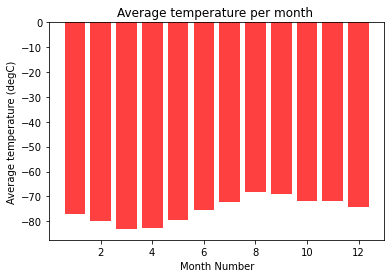

In [207]:
x_axis = np.arange(1, 13, 1)

plt.title("Average temperature per month ")
plt.xlabel("Month Number")
plt.ylabel("Average temperature (degC)")


# plt.plot(x_axis, avg_values.min_temp, marker="o", color="red", linewidth=1);

plt.bar(x_axis, avg_values.min_temp, facecolor="red", alpha=0.75, align="center");

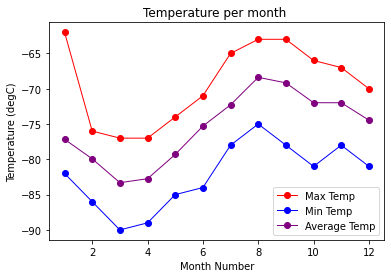

In [126]:
# Identify the coldest and hottest months in Curiosity's location


Max_values_month= mars_data_df.groupby(by='month').max()

Min_values_month = mars_data_df.groupby(by='month').min()

plt.title("Temperature per month ")
plt.xlabel("Month Number")
plt.ylabel("Temperature (degC)")


plt.plot(x_axis, Max_values_month.min_temp, marker="o", color="red", linewidth=1, label='Max Temp' );


plt.plot(x_axis, Min_values_month.min_temp, marker="o", color="blue", linewidth=1, label='Min Temp');

plt.plot(x_axis, avg_values_month.min_temp, marker="o", color="purple", linewidth=1, label='Average Temp');

plt.legend(loc="lower right");

In [127]:
Max_values_month.sort_values(by='min_temp', ascending=False)

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,1668,2017-07-07,1748,29,-62.0,888.0
8,1407,2016-10-11,1487,239,-63.0,914.0
9,1453,2016-11-28,1533,269,-63.0,925.0
7,1360,2016-08-24,1440,209,-65.0,836.0
10,1501,2017-01-16,1581,299,-66.0,917.0
11,1551,2017-03-08,1631,329,-67.0,879.0
12,1608,2017-05-05,1687,359,-70.0,853.0
6,1317,2016-07-02,1388,179,-71.0,764.0
5,1895,2018-02-27,1977,149,-74.0,777.0


In [128]:
Min_values_month.sort_values(by='min_temp', ascending=True)

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
3,421,2013-12-09,477,60,-90.0,833.0
4,487,2014-02-16,544,90,-89.0,754.0
2,371,2013-10-03,412,30,-86.0,867.0
5,552,2014-04-23,609,120,-85.0,727.0
6,2,2012-08-16,10,150,-84.0,732.0
1,319,2013-08-01,351,0,-82.0,820.0
10,107,2013-02-24,197,270,-81.0,862.0
12,263,2013-06-05,295,330,-81.0,829.0
7,3,2012-09-30,54,180,-78.0,751.0


In [129]:
avg_values_month.sort_values(by='min_temp', ascending=False)

,id,sol,ls,min_temp,pressure
month,,,,,
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970
10,955.723214,1034.669643,286.330357,-71.982143,887.312500
11,874.246377,947.224638,314.536232,-71.985507,857.014493
7,714.549296,715.105634,194.894366,-72.281690,795.105634
12,931.602410,990.951807,344.692771,-74.451807,842.156627
6,735.306122,750.829932,164.897959,-75.299320,745.054422
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047


In [132]:
# 4. Average pressure by Martian month

avg_values_month.sort_values(by='pressure', ascending=False)


,id,sol,ls,min_temp,pressure
month,,,,,
9,785.843284,861.186567,254.052239,-69.171642,913.305970
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
10,955.723214,1034.669643,286.330357,-71.982143,887.312500
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
8,718.078014,795.333333,224.347518,-68.382979,873.829787
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
11,874.246377,947.224638,314.536232,-71.985507,857.014493
12,931.602410,990.951807,344.692771,-74.451807,842.156627
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897


In [142]:
ap = avg_values_month.sort_values(by='pressure', ascending=False)

In [144]:
ap.pressure

month
9     913.305970
2     889.455056
10    887.312500
3     877.322917
8     873.829787
1     862.488506
11    857.014493
12    842.156627
4     806.329897
7     795.105634
5     748.557047
6     745.054422
Name: pressure, dtype: float64

No handles with labels found to put in legend.


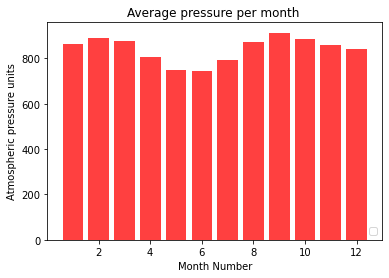

In [208]:
# Plot the average pressure by month

# plt.plot(x_axis, avg_values_month.pressure, marker="o", color="red", linewidth=1, label='Avg Pressure' );

plt.bar(x_axis, avg_values_month.pressure, facecolor="red", alpha=0.75, align="center");

plt.title("Average pressure per month ")
plt.xlabel("Month Number")
plt.ylabel("Atmospheric pressure units")
plt.legend(loc="lower right");


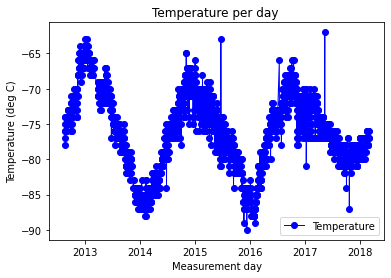

In [147]:
# 5. How many terrestrial (earth) days are there in a Martian year?


plt.plot(mars_data_df.terrestrial_date, mars_data_df.min_temp, marker="o", color="blue", linewidth=1, label='Temperature' );

plt.title("Temperature per day ")
plt.xlabel("Measurement day")
plt.ylabel("Temperature (deg C)")
plt.legend(loc="lower right");


In [151]:
mars_data_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [163]:
mars_df = mars_data_df.copy()

In [166]:
mars_df['Year'] = mars_df.terrestrial_date.dt.strftime('%Y')

In [168]:
mars_df.groupby("Year").min()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
Year,,,,,,,
2012,2,2012-08-16,10,155,6,-78.0,732.0
2013,51,2013-01-01,144,0,1,-87.0,845.0
2014,430,2014-01-01,500,70,3,-88.0,732.0
2015,795,2015-01-01,855,0,1,-90.0,832.0
2016,1140,2016-01-01,1210,88,3,-89.0,732.0
2017,1486,2017-01-01,1566,0,1,-87.0,781.0
2018,1840,2018-01-01,1922,108,4,-80.0,727.0


In [177]:
min_2014  = mars_df.loc[(mars_df.min_temp == -88) & (mars_df.Year == '2014') & (mars_df.pressure == 872), :]

min_2014

,id,terrestrial_date,sol,ls,month,min_temp,pressure,Year
452,464,2014-02-03,532,84,3,-88.0,872.0,2014


In [202]:
min_2015  = mars_df.loc[(mars_df.min_temp == -90) & (mars_df.Year == '2015'), :]

min_2015

,id,terrestrial_date,sol,ls,month,min_temp,pressure,Year
1093,1119,2015-12-09,1188,79,3,-90.0,881.0,2015


In [203]:
min_2015.terrestrial_date.iloc[0] - min_2014.terrestrial_date.iloc[0]

Timedelta('674 days 00:00:00')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [204]:
# Write the data to a CSV

mars_data_df.to_csv("Mars_Temperature_Data.csv",encoding="utf-8", index=False, header=True)

In [205]:
browser.quit()